In [43]:
## imports ##

import os.path
import tkinter
import pandas as pd
import numpy as np
import seaborn as sb
from tkinter import filedialog
import matplotlib.pyplot as plt
from time import sleep

In [64]:
## select xlsx from file explorer ##
excel_file = filedialog.askopenfilename()

print("You've selected: " + excel_file)

csv_name = input('Please name Csv file/heatmap: ').strip()

You've selected: C:/Users/pkalmbac/Downloads/List (75).xlsx


In [65]:
# Read xlsx and convert to csv #

excel_file_df = pd.read_excel(excel_file,
                              index_col = None,
                              header = 0)

In [66]:
## defining csv file path ##

csv_path = 'C:/Users/pkalmbac/PythonProjects/GeneratedCSVs'

csv_path = os.path.join(csv_path,
                        csv_name)

In [67]:
## Convert xlsx to csv ##

excel_file_df.to_csv(csv_path,
                     index = None,
                     header = None)

In [68]:
## create dataframe from csv using value and position columns ##

csv_df = pd.DataFrame(pd.read_csv(csv_path,
                                  usecols = ['Position', 'Concentration']))

csv_df = csv_df.astype(str)

print(csv_df)

    Position Concentration
0        E13   46.50 ng/uL
1        H16   64.20 ng/uL
2        O13   97.00 ng/uL
3        M23  105.50 ng/uL
4        O23   54.30 ng/uL
..       ...           ...
379      H06   38.80 ng/uL
380      H08   54.60 ng/uL
381      H10  115.00 ng/uL
382      H24   61.80 ng/uL
383      O21   66.10 ng/uL

[384 rows x 2 columns]


In [94]:
## ask user if there is a control ##

#ctrl = input('Does this dataset include a control? (y/n)')
#if ctrl == 'n':
#    csv_df.loc[96] = ('C01', 'NaN')



In [69]:
## sort csv ##

csv_df = csv_df.sort_values('Position')

# Extract the float and string parts of column 'A' using a regular expression
csv_df[['Concentration', 'Conc_string']] = csv_df['Concentration'].str.extract(r'^(\d+\.\d+)(\D+)?$')

# Convert the 'A_float' column to float type
csv_df['Concentration'] = csv_df['Concentration'].astype(float)

csv_df = csv_df['Concentration'].astype(float)


# Print the updated DataFrame
print(csv_df)

330     79.7
118     57.5
334     32.8
125     84.5
340     51.0
       ...  
92     109.9
157     74.9
98      58.4
327     90.4
114     64.8
Name: Concentration, Length: 384, dtype: float64


In [70]:
def create_plate(value_list): 
    num_rows = len(value_list) // 24
    plate_df = pd.DataFrame(index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'], columns=range(1, 25))
    
    for i in range(0, len(value_list)):
        row_index = chr(65 + i // 24)  
        col_index = i % 24 + 1
        column_name = f'Column_{col_index}'
        plate_df.loc[row_index, col_index] = value_list[i]
        
    return plate_df



value_list = csv_df.tolist()
df = create_plate(value_list).astype(float)
print(df)

      1      2      3      4      5      6      7      8      9      10  ...  \
A   79.7   57.5   32.8   84.5   51.0   92.2   52.3  108.1   52.6   19.6  ...   
B   55.6   37.0   49.2   85.3  127.9   48.1   65.4   45.0   77.8   43.4  ...   
C   70.8   58.1   46.8   52.4   49.4   85.0   77.2   89.4   15.6   96.7  ...   
D   72.5   18.8   45.2   47.2   48.2   47.9   62.8   57.4   79.3   58.7  ...   
E   50.4  137.0  100.2   57.3   67.0   67.0   90.9   93.3   95.7   94.8  ...   
F   70.7   62.7   99.3   41.1   64.5   50.7   69.4   55.8   60.8   79.4  ...   
G   82.0  145.8   63.2  110.0   52.5  134.8   41.0   64.2   65.4  101.1  ...   
H   29.9  119.7   85.9   60.5   74.5   38.8   68.5   54.6   39.1  115.0  ...   
I   87.0   55.1   17.9  123.0   86.1   78.8  163.8   63.2   81.2   26.7  ...   
J  100.5   68.5   23.2   65.4   50.9   46.9   75.0   89.7   75.1  123.3  ...   
K   43.0   72.3   89.2   39.5   22.8   85.9   64.4   93.3   25.2  134.9  ...   
L   56.2   40.0   68.7  115.1   40.1   2

Heatmap Generated :)


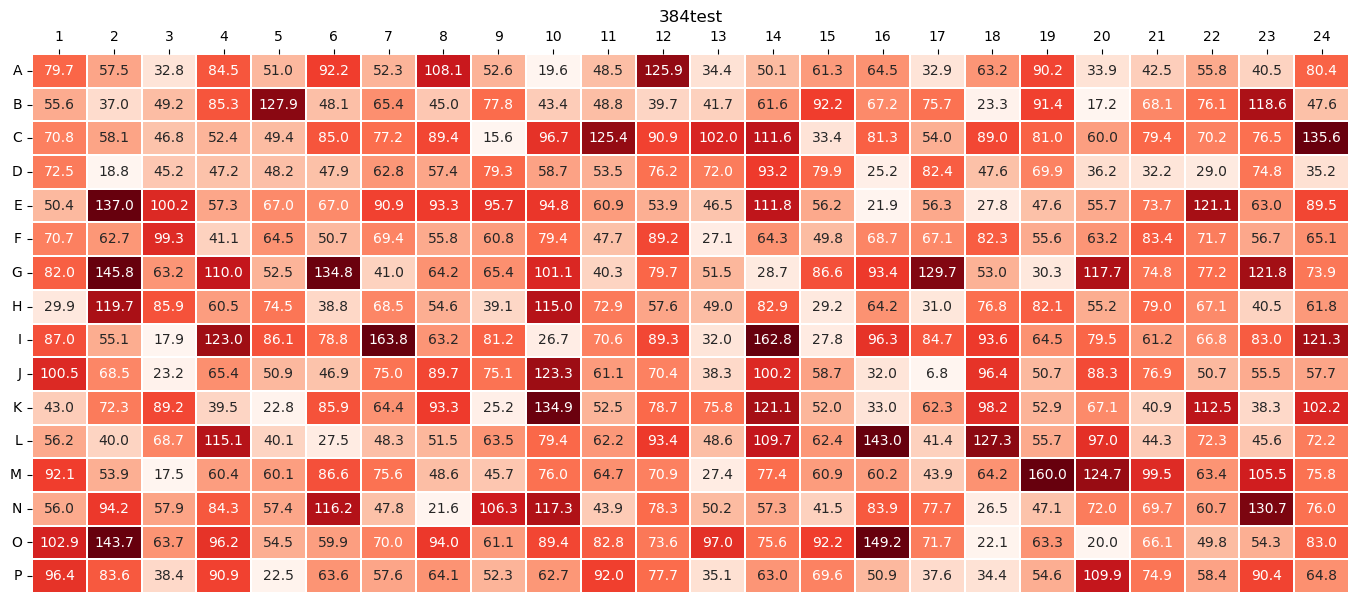

: 

In [71]:

plt.figure(figsize=(17,7))
heatmap = sb.heatmap(df, robust = True, linewidths=.1, cmap='Reds', annot=True, fmt='.1f', cbar=False, mask=df.isnull())
heatmap.set_title(f'{csv_name}')
plt.yticks(rotation = 0)
heatmap.figure.savefig('C:/Users/pkalmbac/PythonProjects/HeatMaps/' + f'{csv_name}' + '.png')
heatmap.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.yticks(rotation = 0)

print('Heatmap Generated :)')
sleep(1)